In [8]:
# # 한글 폰트 설치
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Okt
from tqdm import tqdm
from sklearn.model_selection import train_test_split

In [2]:
okt = Okt()

In [3]:
plt.rcParams['font.family'] = 'NanumGothic'

In [4]:
df = pd.read_csv('라벨링결과_v3.csv')

In [15]:
df.groupby('label').count()

,리뷰,음식유형,리뷰2,리뷰3,리뷰4
label,,,,,
-1,3846,3846,3846,3846,3846
0,13638,13638,12155,13638,12042
1,99585,99585,99585,99585,99585


In [5]:
negative_df  = df[df['label'] == -1]

In [7]:
positive_df  = df[df['label'] == 1]

In [13]:
display(negative_df.groupby('label').count())
display(positive_df.groupby('label').count())

,리뷰,음식유형,리뷰2,리뷰3,리뷰4
label,,,,,
-1,3846,3846,3846,3846,3846


,리뷰,음식유형,리뷰2,리뷰3,리뷰4
label,,,,,
1,99585,99585,99585,99585,99585


In [9]:
positive_df.groupby('label').count()

,리뷰,음식유형,리뷰2,리뷰3,리뷰4
label,,,,,
1,99585,99585,99585,99585,99585


In [16]:
positive_df = positive_df.sample(negative_df.shape[0]+1000)

In [17]:
negative_df['label'] = negative_df['label'].replace(-1, 0)

C:\Users\kh502\AppData\Local\Temp\ipykernel_1300\1740380648.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_df['label'] = negative_df['label'].replace(-1, 0)


In [18]:
df = pd.concat([positive_df, negative_df])

In [19]:
train_df, test_df = train_test_split(df, test_size=0.2)

In [20]:
test_df

,리뷰,음식유형,리뷰2,리뷰3,리뷰4,label
5049,굿,디저트,굿,굿,굿,1
5256,뷰 좋아용,디저트,뷰 좋아용,뷰 좋아용,뷰 좋다,1
82522,영업 전부터 줄서있길래 얼마나 맛있나 궁금했는데 진짜 맛있네요.,퓨전,영업 전부터 줄서있길래 얼마나 맛있나 궁금했는데 진짜 맛있네요,영업 전부터 줄서있길래 얼마나 맛있나 궁금했는데 진짜 맛있네요,영업 전 부터 줄 서 있다 얼마나 맛있다 궁금하다 진짜 맛있다,1
85680,유명하다고 해서 2시간 기다리도 간신히 주차해서 먹었는데 정말 다시는 오고 싶지 ...,한식,유명하다고 해서 시간 기다리도 간신히 주차해서 먹었는데 정말 다시는 오고 싶지 않...,유명하다고 해서 시간 기다리도 간신히 주차해서 먹었는데 정말 다시는 오고 싶지 않...,유명하다 하다 시간 기다리다 간신히 주차 하다 먹다 정말 다시다 오다 싶다 않다 곳...,0
95451,울산의 맛집이죠..,한식,울산의 맛집이죠,울산의 맛집이죠,울산 의 맛집 이 죠,1
...,...,...,...,...,...,...
22758,맛있어요,양식,맛있어요,맛있어요,맛있다,1
112077,맛있게 잘 먹었습니다,한식,맛있게 잘 먹었습니다,맛있게 잘 먹었습니다,맛있다 자다 먹다,1
95465,늘가는곳인데 맛있어요!만두는 필수,한식,늘가는곳인데 맛있어요만두는 필수,늘가는곳인데 맛있어요만두는 필수,늘다 곳 인데 맛있다 만두 는 필수,1
94995,좋아요,한식,좋아요,좋아요,좋다,1


In [21]:
train_df[train_df['리뷰'].duplicated(keep='first') == True]

,리뷰,음식유형,리뷰2,리뷰3,리뷰4,label
83534,좋아요,한식,좋아요,좋아요,좋다,1
1765,굿,디저트,굿,굿,굿,1
112541,굿,해산물,굿,굿,굿,1
80661,굿,카페,굿,굿,굿,1
84858,맛있어요,한식,맛있어요,맛있어요,맛있다,1
...,...,...,...,...,...,...
40498,좋아요,양식,좋아요,좋아요,좋다,1
8579,굿,양식,굿,굿,굿,1
83495,좋아요,한식,좋아요,좋아요,좋다,1
15885,맛있어요,양식,맛있어요,맛있어요,맛있다,1


In [22]:
train_df.drop(train_df[train_df['리뷰'].duplicated(keep='first') == True].index, inplace=True, axis=0)
train_df.reset_index(inplace=True, drop=True)

In [23]:
train_df[train_df['리뷰'].duplicated(keep='first') == True]

,리뷰,음식유형,리뷰2,리뷰3,리뷰4,label


In [24]:
train_df.groupby('label').count()

,리뷰,음식유형,리뷰2,리뷰3,리뷰4
label,,,,,
0,3074,3074,3074,3074,3074
1,3197,3197,3197,3197,3197


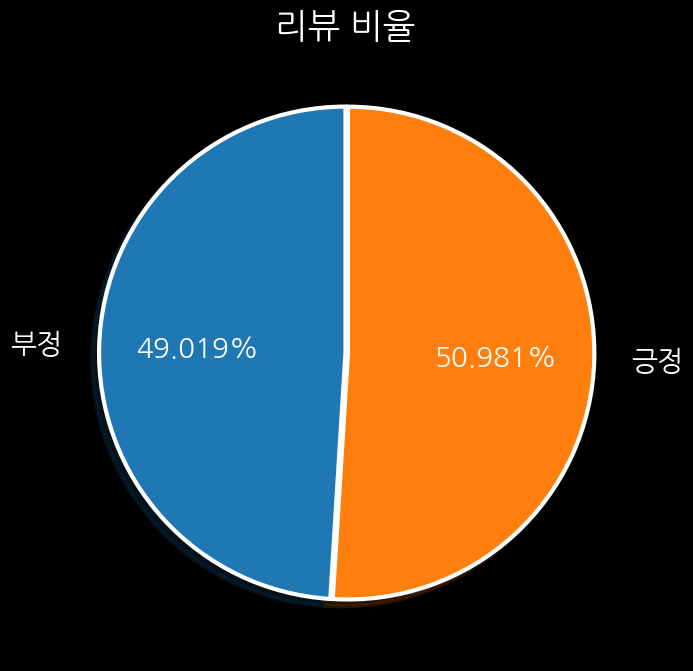

In [26]:
# 그래프 사이즈 조절
plt.figure(figsize=(8,8))

# 데이터 입력
names = ['부정','긍정']
values = train_df.groupby('label').count()['리뷰']

# 파이 차트에 대한 설정
plt.pie(values,
        labels=names,
        labeldistance=1.15,
        wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },
        colors= ['tab:blue','tab:orange'],
        autopct = "%0.3f%%",
        textprops = {"fontsize":20},
        startangle = 90,
        explode = [0,0.01],
        shadow = True
       )

# 타이틀 및 축 설정
plt.title('리뷰 비율', fontsize=25)

# 그래프 보여주기
plt.show()

#  맛 가격 분위기 재방문의사

#OKT pos를 활용하여 조사/구두점/숫자 등을 제거하기

In [38]:
stop_words = [
    '이', '있', '하', '것', '들', '그', '되', '수', '이', '보', '않', '없', '나', '사람', '주', '아니',
    '등', '같', '우리', '때', '년', '가', '한', '지', '대하', '오', '말', '일', '그렇', '위하', '때문', '그것',
    '두', '말하', '알', '그러나', '받', '못하', '일', '그런', '또', '문제', '더', '사회', '많', '그리고', '좋',
    '크', '따르', '중', '나오', '가지', '씨', '시키', '만들', '지금', '생각하', '그러', '속', '하나', '집', '살',
    '모르', '적', '월', '데', '자신', '안', '어떤', '내', '내', '경우', '명', '생각', '시간', '그녀', '다시', '이런',
    '앞', '보이', '번', '나', '다른', '어떻', '여자', '개', '전', '들', '사실', '이렇', '점', '싶', '정도', '좀', '원',
    '잘', '통하', '소리', '놓','다','에','은','을','는','도','요'
]

In [39]:
train_df

,리뷰,음식유형,리뷰2,리뷰3,리뷰4,label,리뷰5
0,너무 친절하고 음식이 맛있어요 ㅎㅎ,일식,너무 친절하고 음식이 맛있어요 ㅎㅎ,너무 친절하고 음식이 맛있어요 ㅎㅎ,너무 친절하다 음식 이 맛있다 ㅎㅎ,1,"[너무, 친절하다, 음식, 맛있다, ㅎㅎ]"
1,정말 기분 더럽게하는 음식점이었네요. 오랜만에 가족끼리 외식하고 기분내려고 갔는건...,해산물,정말 기분 더럽게하는 음식점이었네요 오랜만에 가족끼리 외식하고 기분내려고 갔는건데...,정말 기분 더럽게하는 음식점이었네요 오랜만에 가족끼리 외식하고 기분내려고 갔는건데...,정말 기분 더럽다 하다 음식점 이다 오랜 만 에 가족 끼리 외식 하고 기분 내 려고...,0,"[정말, 기분, 더럽다, 하다, 음식점, 이다, 오랜, 만, 가족, 끼리, 외식, ..."
2,두번째 방문인데~ 엄마가 빵이맛잇다고ㅎ역쉬 가격은 사~악하지만🤣맛잇으니🥰 굿👍,카페,두번째 방문인데 엄마가 빵이맛잇다고ㅎ역쉬 가격은 사악하지만맛잇으니 굿,두번째 방문인데 엄마가 빵이맛잇다고ㅎ역쉬 가격은 사악하지만맛잇으니 굿,두번째 방문 인데 엄마 가 빵 이 맛 잇다 ㅎ 역쉬 가격 은 사악하다 맛 잇다 굿,0,"[두번째, 방문, 인데, 엄마, 빵, 맛, 잇다, ㅎ, 역쉬, 가격, 사악하다, 맛..."
3,집들어가는길에 시원한 라떼한잔^^아인슈페너 생각나서 들어갔는데지금은 안된다고해서 ...,카페,집들어가는길에 시원한 라떼한잔아인슈페너 생각나서 들어갔는데지금은 안된다고해서 그린...,집들어가는길에 시원한 라떼한잔아인슈페너 생각나서 들어갔는데지금은 안된다고해서 그린...,집 들어가다 길 에 시원하다 라떼 한잔 아인 슈페 너 생각나다 들어가다 지 금은 안...,1,"[들어가다, 길, 시원하다, 라떼, 한잔, 아인, 슈페, 너, 생각나다, 들어가다,..."
4,친절해요~,양식,친절해요,친절해요,친절하다,1,[친절하다]
...,...,...,...,...,...,...,...
6266,분위기좋고맛있어요,양식,분위기좋고맛있어요,분위기좋고맛있어요,분위기 좋다 맛있다,1,"[분위기, 좋다, 맛있다]"
6267,커피는 쏘쏘 맛있는건 아니구 그냥 저냥 원두 뷰값이라 생각하고 사먹었어요 라떼는 싱...,카페,커피는 쏘쏘 맛있는건 아니구 그냥 저냥 원두 뷰값이라 생각하고 사먹었어요 라떼는 싱...,커피는 쏘쏘 맛있는건 아니구 그냥 저냥 원두 뷰값이라 생각하고 사먹었어요 라떼는 싱...,커피 는 쏘다 쏘다 맛있다 아니다 그냥 저 냥 원두 뷰값 이라 생각 하고 사먹다 라...,0,"[커피, 쏘다, 쏘다, 맛있다, 아니다, 그냥, 저, 냥, 원두, 뷰값, 이라, 하..."
6268,언양에 불고기집은 많고도 많지만인스타나 sns에 어찌나 광고가 거창한지이 추운날 한...,한식,언양에 불고기집은 많고도 많지만인스타나 에 어찌나 광고가 거창한지이 추운날 한시간 ...,언양에 불고기집은 많고도 많지만인스타나 에 어찌나 광고가 거창한지이 추운날 한시간 ...,언양 에 불고기 집다 많다 많다 인스타 나 에 어찌나 광고 가 거창하다 추다 날 한...,0,"[언양, 불고기, 집다, 많다, 많다, 인스타, 어찌나, 광고, 거창하다, 추다, ..."
6269,점심특선 먹으러 가족과 같이 갔어요. 가성비 좋고 맛이 최고여요. 매장이 깔끔하고 ...,일식,점심특선 먹으러 가족과 같이 갔어요 가성비 좋고 맛이 최고여요 매장이 깔끔하고 음식...,점심특선 먹으러 가족과 같이 갔어요 가성비 좋고 맛이 최고여요 매장이 깔끔하고 음식...,점심 특선 먹다 가족 과 같이 가다 가성 비 좋다 맛 이 최고 여요 매장 이 깔끔하...,1,"[점심, 특선, 먹다, 가족, 과, 같이, 가다, 가성, 비, 좋다, 맛, 최고, ..."


In [40]:
def remove_stopwords(text):
    words = text.split()  # 문장을 단어로 분리
    filtered_words = [word for word in words if word not in stop_words]  # 불용어 제거
    return ' '.join(filtered_words)  # 제거된 단어를 다시 문장으로 결합하여 반환

In [41]:
# '리뷰' 열의 값들에 대해 불용어 제거하여 새로운 열에 저장
train_df['리뷰5'] = train_df['리뷰4'].apply(remove_stopwords)

In [42]:
train_df['리뷰5'] = train_df['리뷰5'].apply(lambda x: x.split())

In [43]:
train_df['리뷰5']

0                                 [너무, 친절하다, 음식, 맛있다, ㅎㅎ]
1       [정말, 기분, 더럽다, 하다, 음식점, 이다, 오랜, 만, 가족, 끼리, 외식, ...
2       [두번째, 방문, 인데, 엄마, 빵, 맛, 잇다, ㅎ, 역쉬, 가격, 사악하다, 맛...
3       [들어가다, 길, 시원하다, 라떼, 한잔, 아인, 슈페, 너, 생각나다, 들어가다,...
4                                                  [친절하다]
                              ...                        
6266                                       [분위기, 좋다, 맛있다]
6267    [커피, 쏘다, 쏘다, 맛있다, 아니다, 그냥, 저, 냥, 원두, 뷰값, 이라, 하...
6268    [언양, 불고기, 집다, 많다, 많다, 인스타, 어찌나, 광고, 거창하다, 추다, ...
6269    [점심, 특선, 먹다, 가족, 과, 같이, 가다, 가성, 비, 좋다, 맛, 최고, ...
6270    [리뷰, 보고, 가다, 너무, 기대하다, 가다, 그냥, 그렇다, 담, 엔, 코스, ...
Name: 리뷰5, Length: 6271, dtype: object

In [44]:
total_word = []
for i in range(len(train_df)):
    for word in train_df['리뷰5'].loc[i]:
        total_word.append(word)

In [45]:
import collections
collections.Counter(total_word).most_common(20)

[('하다', 4208),
 ('먹다', 2646),
 ('맛있다', 2640),
 ('좋다', 1859),
 ('너무', 1775),
 ('맛', 1729),
 ('없다', 1327),
 ('있다', 1251),
 ('오다', 1214),
 ('음식', 1197),
 ('가다', 1123),
 ('이다', 875),
 ('같다', 824),
 ('보다', 819),
 ('나오다', 766),
 ('직원', 761),
 ('아니다', 717),
 ('방문', 704),
 ('친절하다', 689),
 ('않다', 661)]

In [67]:
positive_train_df = train_df[train_df['label'] == 1]
negative_train_df = train_df[train_df['label'] == 0]

In [68]:
negative_train_df

,리뷰,음식유형,리뷰2,리뷰3,리뷰4,label,리뷰5,new리뷰,토큰화된리뷰
1,정말 기분 더럽게하는 음식점이었네요. 오랜만에 가족끼리 외식하고 기분내려고 갔는건...,해산물,정말 기분 더럽게하는 음식점이었네요 오랜만에 가족끼리 외식하고 기분내려고 갔는건데...,정말 기분 더럽게하는 음식점이었네요 오랜만에 가족끼리 외식하고 기분내려고 갔는건데...,정말 기분 더럽다 하다 음식점 이다 오랜 만 에 가족 끼리 외식 하고 기분 내 려고...,0,"[정말, 기분, 더럽다, 하다, 음식점, 이다, 오랜, 만, 가족, 끼리, 외식, ...","[정말, 기분, 더럽다, 하다, 음식점, 이다, 오랜, 만, 가족, 끼리, 외식, ...","[42, 70, 423, 1, 707, 12, 172, 24, 113, 413, 5..."
2,두번째 방문인데~ 엄마가 빵이맛잇다고ㅎ역쉬 가격은 사~악하지만🤣맛잇으니🥰 굿👍,카페,두번째 방문인데 엄마가 빵이맛잇다고ㅎ역쉬 가격은 사악하지만맛잇으니 굿,두번째 방문인데 엄마가 빵이맛잇다고ㅎ역쉬 가격은 사악하지만맛잇으니 굿,두번째 방문 인데 엄마 가 빵 이 맛 잇다 ㅎ 역쉬 가격 은 사악하다 맛 잇다 굿,0,"[두번째, 방문, 인데, 엄마, 빵, 맛, 잇다, ㅎ, 역쉬, 가격, 사악하다, 맛...","[두번째, 방문, 인데, 엄마, 빵, 맛, 잇다, ㅎ, 역쉬, 가격, 사악하다, 맛...","[324, 18, 60, 783, 53, 6, 151, 156, 30, 1463, ..."
6,실내가 조금 덥긴 했지만 미친비주얼의 음료보고 다까먹었어요ㅋㅋㅋㅋ 왜 비싼지 납득되...,카페,실내가 조금 덥긴 했지만 미친비주얼의 음료보고 다까먹었어요ㅋㅋㅋㅋ 왜 비싼지 납득되...,실내가 조금 덥긴 했지만 미친비주얼의 음료보고 다까먹었어요ㅋㅋㅋ 왜 비싼지 납득되는...,실내 가 조금 덥다 하다 미치다 비주 얼 의 음료 보고 다 까먹다 ㅋㅋㅋ 왜 비싸다...,0,"[실내, 조금, 덥다, 하다, 미치다, 비주, 얼, 의, 음료, 보고, 까먹다, ㅋ...","[실내, 조금, 덥다, 하다, 미치다, 비주, 얼, 의, 음료, 보고, 까먹다, ㅋ...","[884, 78, 168, 1, 687, 910, 973, 59, 134, 129,..."
8,예전맛은 아니지만 그래도 가게되는,한식,예전맛은 아니지만 그래도 가게되는,예전맛은 아니지만 그래도 가게되는,예 전 맛 은 아니다 그래도 가게 되다,0,"[예, 맛, 아니다, 그래도, 가게, 되다]","[예, 맛, 아니다, 그래도, 가게, 되다]","[289, 6, 17, 219, 149, 34]"
9,또 올 집입니당 인스타에서 보고 바로 달려왔는데 인스타에서 본것처럼 실제로 맛보니 ...,한식,또 올 집입니당 인스타에서 보고 바로 달려왔는데 인스타에서 본것처럼 실제로 맛보니 ...,또 올 집입니다 인스타에서 보고 바로 달려왔는데 인스타에서 본것처럼 실제로 맛보니 ...,또 오다 집 이다 인스타 에서 보고 바로 달려오다 인스타 에서 보다 실제 로 맛보다...,0,"[오다, 이다, 인스타, 에서, 보고, 바로, 달려오다, 인스타, 에서, 보다, 실...","[오다, 이다, 인스타, 에서, 보고, 바로, 달려오다, 인스타, 에서, 보다, 실...","[9, 12, 935, 31, 129, 154, 2210, 935, 31, 14, ..."
...,...,...,...,...,...,...,...,...,...
6260,울산에 오면 꼭 먹어줘야 하는 짬뽕정!!고기 짬뽕의 맛을 느끼고 싶다면 강추합니다!!,중식,울산에 오면 꼭 먹어줘야 하는 짬뽕정고기 짬뽕의 맛을 느끼고 싶다면 강추합니다,울산에 오면 꼭 먹어줘야 하는 짬뽕정고기 짬뽕의 맛을 느끼고 싶다면 강추합니다,울산 에 오다 꼭 먹어주다 하다 짬뽕 정 고기 짬뽕 의 맛 을 느끼다 싶다 강 추하다,0,"[울산, 오다, 꼭, 먹어주다, 하다, 짬뽕, 정, 고기, 짬뽕, 의, 맛, 느끼다...","[울산, 오다, 꼭, 먹어주다, 하다, 짬뽕, 정, 고기, 짬뽕, 의, 맛, 느끼다...","[77, 9, 130, 2630, 1, 195, 1680, 45, 195, 59, ..."
6262,"적당한 맛과 양, 단 1만3천원은 좀 비싼 느낌.",중식,적당한 맛과 양 단 만천원은 좀 비싼 느낌,적당한 맛과 양 단 만천원은 좀 비싼 느낌,적당하다 맛 과 양 단 만천원 은 좀 비싸다 느낌,0,"[적당하다, 맛, 과, 양, 단, 만천원, 비싸다, 느낌]","[적당하다, 맛, 과, 양, 단, 만천원, 비싸다, 느낌]","[431, 6, 57, 96, 656, 2866, 32, 133]"
6263,예전만큼은 아니네요,양식,예전만큼은 아니네요,예전만큼은 아니네요,예전 만큼은 아니다,0,"[예전, 만큼은, 아니다]","[예전, 만큼은, 아니다]","[183, 1425, 17]"
6267,커피는 쏘쏘 맛있는건 아니구 그냥 저냥 원두 뷰값이라 생각하고 사먹었어요 라떼는 싱...,카페,커피는 쏘쏘 맛있는건 아니구 그냥 저냥 원두 뷰값이라 생각하고 사먹었어요 라떼는 싱...,커피는 쏘쏘 맛있는건 아니구 그냥 저냥 원두 뷰값이라 생각하고 사먹었어요 라떼는 싱...,커피 는 쏘다 쏘다 맛있다 아니다 그냥 저 냥 원두 뷰값 이라 생각 하고 사먹다 라...,0,"[커피, 쏘다, 쏘다, 맛있다, 아니다, 그냥, 저, 냥, 원두, 뷰값, 이라, 하...","[커피, 쏘다, 쏘다, 맛있다, 아니다, 그냥, 저, 냥, 원두, 뷰값, 이라, 하...","[47, 271, 271, 3, 17, 74, 115, 797, 2484, 2482..."


In [69]:
positive_train_df

,리뷰,음식유형,리뷰2,리뷰3,리뷰4,label,리뷰5,new리뷰,토큰화된리뷰
0,너무 친절하고 음식이 맛있어요 ㅎㅎ,일식,너무 친절하고 음식이 맛있어요 ㅎㅎ,너무 친절하고 음식이 맛있어요 ㅎㅎ,너무 친절하다 음식 이 맛있다 ㅎㅎ,1,"[너무, 친절하다, 음식, 맛있다, ㅎㅎ]","[너무, 친절하다, 음식, 맛있다, ㅎㅎ]","[5, 19, 10, 3, 67]"
3,집들어가는길에 시원한 라떼한잔^^아인슈페너 생각나서 들어갔는데지금은 안된다고해서 ...,카페,집들어가는길에 시원한 라떼한잔아인슈페너 생각나서 들어갔는데지금은 안된다고해서 그린...,집들어가는길에 시원한 라떼한잔아인슈페너 생각나서 들어갔는데지금은 안된다고해서 그린...,집 들어가다 길 에 시원하다 라떼 한잔 아인 슈페 너 생각나다 들어가다 지 금은 안...,1,"[들어가다, 길, 시원하다, 라떼, 한잔, 아인, 슈페, 너, 생각나다, 들어가다,...","[들어가다, 길, 시원하다, 라떼, 한잔, 아인, 슈페, 너, 생각나다, 들어가다,...","[106, 784, 380, 464, 1018, 2520, 1989, 444, 30..."
4,친절해요~,양식,친절해요,친절해요,친절하다,1,[친절하다],[친절하다],[19]
5,서생 카페들중 단연 일등인것같아요 너무 마음에드는 카페에요 사진도 너무 잘나오고 음...,카페,서생 카페들중 단연 일등인것같아요 너무 마음에드는 카페에요 사진도 너무 잘나오고 음...,서생 카페들중 단연 일등인것같아요 너무 마음에드는 카페에요 사진도 너무 잘나오고 음...,서생 카페 들 중 단연 일등 인 것 같다 너무 마음 에드 는 카페 에요 사진 도 너...,1,"[서생, 카페, 단연, 일등, 인, 같다, 너무, 마음, 에드, 카페, 에요, 사진...","[서생, 카페, 단연, 일등, 인, 같다, 너무, 마음, 에드, 카페, 에요, 사진...","[2905, 127, 82, 13, 5, 502, 127, 315, 198, 5, ..."
7,자주 오는데 넘 맛있어요!,한식,자주 오는데 넘 맛있어요,자주 오는데 넘 맛있어요,자주 오다 넘다 맛있다,1,"[자주, 오다, 넘다, 맛있다]","[자주, 오다, 넘다, 맛있다]","[116, 9, 43, 3]"
...,...,...,...,...,...,...,...,...,...
6264,분위기 좋습니다,한식,분위기 좋습니다,분위기 좋습니다,분위기 좋다,1,"[분위기, 좋다]","[분위기, 좋다]","[40, 4]"
6265,울산 지나가다가 한옥카페가 너무 이뻐서 들어왔는데 매장 분위기도 넘 좋네요 시그니처...,카페,울산 지나가다가 한옥카페가 너무 이뻐서 들어왔는데 매장 분위기도 넘 좋네요 시그니처...,울산 지나가다가 한옥카페가 너무 이뻐서 들어왔는데 매장 분위기도 넘 좋네요 시그니처...,울산 지나가다 한 옥 카페 가 너무 이쁘다 들어오다 매장 분위기 도 넘다 좋다 시 ...,1,"[울산, 지나가다, 옥, 카페, 너무, 이쁘다, 들어오다, 매장, 분위기, 넘다, ...","[울산, 지나가다, 옥, 카페, 너무, 이쁘다, 들어오다, 매장, 분위기, 넘다, ...","[77, 608, 343, 127, 5, 312, 362, 66, 40, 43, 4..."
6266,분위기좋고맛있어요,양식,분위기좋고맛있어요,분위기좋고맛있어요,분위기 좋다 맛있다,1,"[분위기, 좋다, 맛있다]","[분위기, 좋다, 맛있다]","[40, 4, 3]"
6269,점심특선 먹으러 가족과 같이 갔어요. 가성비 좋고 맛이 최고여요. 매장이 깔끔하고 ...,일식,점심특선 먹으러 가족과 같이 갔어요 가성비 좋고 맛이 최고여요 매장이 깔끔하고 음식...,점심특선 먹으러 가족과 같이 갔어요 가성비 좋고 맛이 최고여요 매장이 깔끔하고 음식...,점심 특선 먹다 가족 과 같이 가다 가성 비 좋다 맛 이 최고 여요 매장 이 깔끔하...,1,"[점심, 특선, 먹다, 가족, 과, 같이, 가다, 가성, 비, 좋다, 맛, 최고, ...","[점심, 특선, 먹다, 가족, 과, 같이, 가다, 가성, 비, 좋다, 맛, 최고, ...","[207, 732, 2, 113, 57, 185, 11, 140, 125, 4, 6..."


In [70]:
train_df['new리뷰'] = train_df['리뷰5'].copy()

In [71]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_df['new리뷰'])

In [72]:
print(tokenizer.word_index)

{'하다': 1, '먹다': 2, '맛있다': 3, '좋다': 4, '너무': 5, '맛': 6, '없다': 7, '있다': 8, '오다': 9, '음식': 10, '가다': 11, '이다': 12, '같다': 13, '보다': 14, '나오다': 15, '직원': 16, '아니다': 17, '방문': 18, '친절하다': 19, '않다': 20, '분': 21, '으로': 22, '로': 23, '만': 24, '하고': 25, '를': 26, '고': 27, '많다': 28, '곳': 29, '가격': 30, '에서': 31, '비싸다': 32, '자다': 33, '되다': 34, '메뉴': 35, '주문': 36, '아쉽다': 37, '진짜': 38, '예약': 39, '분위기': 40, '들다': 41, '정말': 42, '넘다': 43, '그렇다': 44, '고기': 45, '많이': 46, '커피': 47, 'ㅠ': 48, '서비스': 49, '테이블': 50, '랑': 51, '못': 52, '빵': 53, '뷰': 54, '맛집': 55, '시키다': 56, '과': 57, '이라': 58, '의': 59, '인데': 60, '손님': 61, '주다': 62, '자리': 63, '분들': 64, '해주다': 65, '매장': 66, 'ㅎㅎ': 67, '대게': 68, '처음': 69, '기분': 70, '나다': 71, '까지': 72, '파스타': 73, '그냥': 74, '갈다': 75, '서': 76, '울산': 77, '조금': 78, '싶다': 79, '밥': 80, '기다리다': 81, '인': 82, '받다': 83, '주차': 84, '식사': 85, '스테이크': 86, '시': 87, '추천': 88, 'ㅠㅠ': 89, '와': 90, '이랑': 91, '넓다': 92, '님': 93, '아이': 94, '다음': 95, '양': 96, '괜찮다': 97, '불편하다': 98, '게': 99, '별로': 100, '깔끔하다': 

In [73]:
print(tokenizer.word_counts)

OrderedDict([('너무', 1775), ('친절하다', 689), ('음식', 1197), ('맛있다', 2640), ('ㅎㅎ', 278), ('정말', 356), ('기분', 273), ('더럽다', 48), ('하다', 4208), ('음식점', 28), ('이다', 875), ('오랜', 118), ('만', 558), ('가족', 176), ('끼리', 49), ('외식', 37), ('하고', 557), ('려고', 10), ('가다', 1123), ('예약', 393), ('모르다', 164), ('손님', 294), ('오다', 1214), ('인사', 28), ('커녕', 6), ('멀뚱멀뚱', 5), ('처', 23), ('보다', 819), ('니깐', 12), ('저기', 11), ('멀리', 31), ('있다', 1251), ('직원', 761), ('굳이', 21), ('불다', 54), ('잉', 4), ('뭐라다', 7), ('걸', 58), ('세우다', 5), ('두다', 66), ('몇번', 44), ('반복', 5), ('뭐', 87), ('건지다', 87), ('더러워지다', 3), ('자리다', 38), ('없이', 160), ('여기', 177), ('서', 259), ('아무', 42), ('앉다', 136), ('얻어먹다', 3), ('그딴', 1), ('식', 70), ('으론', 6), ('다시다', 116), ('싶다', 242), ('두번째', 65), ('방문', 704), ('인데', 295), ('엄마', 25), ('빵', 315), ('맛', 1729), ('잇다', 131), ('ㅎ', 128), ('역쉬', 1), ('가격', 467), ('사악하다', 10), ('굿', 73), ('들어가다', 189), ('길', 25), ('시원하다', 55), ('라떼', 44), ('한잔', 17), ('아인', 4), ('슈페', 6), ('너', 45), ('생각나다', 71), ('금은', 

In [74]:
# 전체 단어 개수
print(len(tokenizer.word_counts))

8160


In [75]:
threshold = 3
rare_cnt = 0
for i,j in tokenizer.word_counts.items():
    if j < threshold:
        rare_cnt +=1

print(rare_cnt)

4696


In [76]:
print(len(tokenizer.word_counts)-rare_cnt)

3464


In [77]:
vocab_size = len(tokenizer.word_counts)-rare_cnt
tokenizer = Tokenizer(vocab_size)
tokenizer.fit_on_texts(train_df['new리뷰'])
X_train = tokenizer.texts_to_sequences(train_df['new리뷰'])

In [78]:
train_df['토큰화된리뷰'] = X_train

In [167]:
index_list = []
for i in range(len(train_df)):
    if len(train_df['토큰화된리뷰'].loc[i]) == 0:
        index_list.append(i)
train_df.loc[index_list]

,리뷰,음식유형,리뷰2,리뷰3,리뷰4,label,리뷰5,new리뷰,토큰화된리뷰


In [169]:
train_df.drop(index_list,inplace=True,axis=0)
train_df.reset_index(inplace=True, drop=True)
train_df[['리뷰','리뷰3','리뷰5','토큰화된리뷰','label']]

,리뷰,리뷰3,리뷰5,토큰화된리뷰,label
0,너무 친절하고 음식이 맛있어요 ㅎㅎ,너무 친절하고 음식이 맛있어요 ㅎㅎ,"[너무, 친절하다, 음식, 맛있다, ㅎㅎ]","[5, 19, 10, 3, 67]",1
1,정말 기분 더럽게하는 음식점이었네요. 오랜만에 가족끼리 외식하고 기분내려고 갔는건...,정말 기분 더럽게하는 음식점이었네요 오랜만에 가족끼리 외식하고 기분내려고 갔는건데...,"[정말, 기분, 더럽다, 하다, 음식점, 이다, 오랜, 만, 가족, 끼리, 외식, ...","[42, 70, 423, 1, 707, 12, 172, 24, 113, 413, 5...",0
2,두번째 방문인데~ 엄마가 빵이맛잇다고ㅎ역쉬 가격은 사~악하지만🤣맛잇으니🥰 굿👍,두번째 방문인데 엄마가 빵이맛잇다고ㅎ역쉬 가격은 사악하지만맛잇으니 굿,"[두번째, 방문, 인데, 엄마, 빵, 맛, 잇다, ㅎ, 역쉬, 가격, 사악하다, 맛...","[324, 18, 60, 783, 53, 6, 151, 156, 30, 1463, ...",0
3,집들어가는길에 시원한 라떼한잔^^아인슈페너 생각나서 들어갔는데지금은 안된다고해서 ...,집들어가는길에 시원한 라떼한잔아인슈페너 생각나서 들어갔는데지금은 안된다고해서 그린...,"[들어가다, 길, 시원하다, 라떼, 한잔, 아인, 슈페, 너, 생각나다, 들어가다,...","[106, 784, 380, 464, 1018, 2520, 1989, 444, 30...",1
4,친절해요~,친절해요,[친절하다],[19],1
...,...,...,...,...,...
6266,분위기좋고맛있어요,분위기좋고맛있어요,"[분위기, 좋다, 맛있다]","[40, 4, 3]",1
6267,커피는 쏘쏘 맛있는건 아니구 그냥 저냥 원두 뷰값이라 생각하고 사먹었어요 라떼는 싱...,커피는 쏘쏘 맛있는건 아니구 그냥 저냥 원두 뷰값이라 생각하고 사먹었어요 라떼는 싱...,"[커피, 쏘다, 쏘다, 맛있다, 아니다, 그냥, 저, 냥, 원두, 뷰값, 이라, 하...","[47, 271, 271, 3, 17, 74, 115, 797, 2484, 2482...",0
6268,언양에 불고기집은 많고도 많지만인스타나 sns에 어찌나 광고가 거창한지이 추운날 한...,언양에 불고기집은 많고도 많지만인스타나 에 어찌나 광고가 거창한지이 추운날 한시간 ...,"[언양, 불고기, 집다, 많다, 많다, 인스타, 어찌나, 광고, 거창하다, 추다, ...","[1137, 299, 748, 28, 28, 935, 1968, 823, 126, ...",0
6269,점심특선 먹으러 가족과 같이 갔어요. 가성비 좋고 맛이 최고여요. 매장이 깔끔하고 ...,점심특선 먹으러 가족과 같이 갔어요 가성비 좋고 맛이 최고여요 매장이 깔끔하고 음식...,"[점심, 특선, 먹다, 가족, 과, 같이, 가다, 가성, 비, 좋다, 맛, 최고, ...","[207, 732, 2, 113, 57, 185, 11, 140, 125, 4, 6...",1


In [81]:
y_train = train_df['label']

리뷰의 최대 길이 : 129
리뷰의 평균 길이 : 18.722372827300273


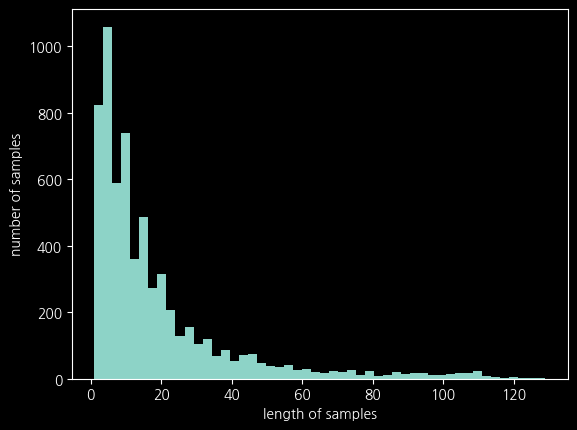

In [82]:
X_train = train_df['토큰화된리뷰']
print('리뷰의 최대 길이 :',max(len(review) for review in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [83]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
X_train = pad_sequences(X_train, maxlen=30)

In [163]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.keras', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(X_train, y_train, epochs=3, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/3
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - acc: 0.6965 - loss: 0.5768
Epoch 1: val_acc improved from -inf to 0.90199, saving model to best_model.keras
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - acc: 0.6977 - loss: 0.5752 - val_acc: 0.9020 - val_loss: 0.2385
Epoch 2/3
78/79 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - acc: 0.9272 - loss: 0.1975
Epoch 2: val_acc improved from 0.90199 to 0.93865, saving model to best_model.keras
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - acc: 0.9275 - loss: 0.1969 - val_acc: 0.9386 - val_loss: 0.1850
Epoch 3/3
78/79 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - acc: 0.9597 - loss: 0.1154
Epoch 3: val_acc improved from 0.93865 to 0.95219, saving model to best_model.keras
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - acc: 0.9598 - loss: 0.1153 - val_acc: 0.9522 - val_loss: 0.1330


In [90]:
test_df

,리뷰,음식유형,리뷰2,리뷰3,리뷰4,label,토큰화된리뷰
5049,굿,디저트,굿,굿,굿,1,[294]
5256,뷰 좋아용,디저트,뷰 좋아용,뷰 좋아용,뷰 좋다,1,"[54, 4]"
82522,영업 전부터 줄서있길래 얼마나 맛있나 궁금했는데 진짜 맛있네요.,퓨전,영업 전부터 줄서있길래 얼마나 맛있나 궁금했는데 진짜 맛있네요,영업 전부터 줄서있길래 얼마나 맛있나 궁금했는데 진짜 맛있네요,영업 전 부터 줄 서 있다 얼마나 맛있다 궁금하다 진짜 맛있다,1,"[1341, 139, 215, 76, 8, 1038, 3, 1184, 38, 3]"
85680,유명하다고 해서 2시간 기다리도 간신히 주차해서 먹었는데 정말 다시는 오고 싶지 ...,한식,유명하다고 해서 시간 기다리도 간신히 주차해서 먹었는데 정말 다시는 오고 싶지 않...,유명하다고 해서 시간 기다리도 간신히 주차해서 먹었는데 정말 다시는 오고 싶지 않...,유명하다 하다 시간 기다리다 간신히 주차 하다 먹다 정말 다시다 오다 싶다 않다 곳...,0,"[512, 1, 81, 84, 1, 2, 42, 177, 9, 79, 20, 29,..."
95451,울산의 맛집이죠..,한식,울산의 맛집이죠,울산의 맛집이죠,울산 의 맛집 이 죠,1,"[77, 59, 55, 501]"
...,...,...,...,...,...,...,...
22758,맛있어요,양식,맛있어요,맛있어요,맛있다,1,[3]
112077,맛있게 잘 먹었습니다,한식,맛있게 잘 먹었습니다,맛있게 잘 먹었습니다,맛있다 자다 먹다,1,"[3, 33, 2]"
95465,늘가는곳인데 맛있어요!만두는 필수,한식,늘가는곳인데 맛있어요만두는 필수,늘가는곳인데 맛있어요만두는 필수,늘다 곳 인데 맛있다 만두 는 필수,1,"[308, 29, 60, 3, 449, 964]"
94995,좋아요,한식,좋아요,좋아요,좋다,1,[4]


In [91]:
X_test = tokenizer.texts_to_sequences(test_df['리뷰4'])
test_df['토큰화된리뷰'] = X_test
test_df

,리뷰,음식유형,리뷰2,리뷰3,리뷰4,label,토큰화된리뷰
5049,굿,디저트,굿,굿,굿,1,[294]
5256,뷰 좋아용,디저트,뷰 좋아용,뷰 좋아용,뷰 좋다,1,"[54, 4]"
82522,영업 전부터 줄서있길래 얼마나 맛있나 궁금했는데 진짜 맛있네요.,퓨전,영업 전부터 줄서있길래 얼마나 맛있나 궁금했는데 진짜 맛있네요,영업 전부터 줄서있길래 얼마나 맛있나 궁금했는데 진짜 맛있네요,영업 전 부터 줄 서 있다 얼마나 맛있다 궁금하다 진짜 맛있다,1,"[1341, 139, 215, 76, 8, 1038, 3, 1184, 38, 3]"
85680,유명하다고 해서 2시간 기다리도 간신히 주차해서 먹었는데 정말 다시는 오고 싶지 ...,한식,유명하다고 해서 시간 기다리도 간신히 주차해서 먹었는데 정말 다시는 오고 싶지 않...,유명하다고 해서 시간 기다리도 간신히 주차해서 먹었는데 정말 다시는 오고 싶지 않...,유명하다 하다 시간 기다리다 간신히 주차 하다 먹다 정말 다시다 오다 싶다 않다 곳...,0,"[512, 1, 81, 84, 1, 2, 42, 177, 9, 79, 20, 29,..."
95451,울산의 맛집이죠..,한식,울산의 맛집이죠,울산의 맛집이죠,울산 의 맛집 이 죠,1,"[77, 59, 55, 501]"
...,...,...,...,...,...,...,...
22758,맛있어요,양식,맛있어요,맛있어요,맛있다,1,[3]
112077,맛있게 잘 먹었습니다,한식,맛있게 잘 먹었습니다,맛있게 잘 먹었습니다,맛있다 자다 먹다,1,"[3, 33, 2]"
95465,늘가는곳인데 맛있어요!만두는 필수,한식,늘가는곳인데 맛있어요만두는 필수,늘가는곳인데 맛있어요만두는 필수,늘다 곳 인데 맛있다 만두 는 필수,1,"[308, 29, 60, 3, 449, 964]"
94995,좋아요,한식,좋아요,좋아요,좋다,1,[4]


In [164]:
# 모델을 로드합니다.
model = load_model('best_model.keras')

X_test = pad_sequences(test_df['토큰화된리뷰'], maxlen=30)
y_test = test_df['label']

# 테스트 데이터를 사용하여 모델을 평가합니다.
test_loss, test_acc = model.evaluate(X_test, y_test)

print('테스트 손실:', test_loss)
print('테스트 정확도:', test_acc)

55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.9641 - loss: 0.1268
테스트 손실: 0.11778680980205536
테스트 정확도: 0.9620471596717834


<Figure size 640x480 with 0 Axes>

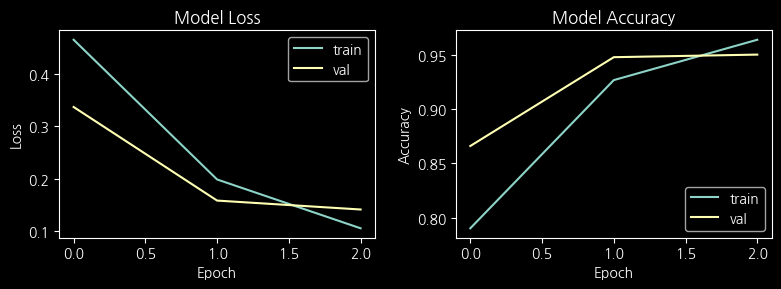

In [94]:
plt.clf()
plt.figure(figsize=(8,3))

# 훈련 손실 그래프
plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper right')

# 훈련 정확도 그래프
plt.subplot(122)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='lower right')
plt.tight_layout()
plt.show()


In [165]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Embedding
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=32))

# GRU 층 추가 후 드롭아웃 적용
model.add(GRU(32))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=4)
model_checkpoint = ModelCheckpoint('best_model_GRU.keras', monitor='val_accuracy', save_best_only=True, verbose=1)

# 모델 학습
history = model.fit(X_train, y_train, epochs=2, batch_size=64, validation_split=0.2, callbacks=[early_stopping, model_checkpoint])


Epoch 1/2
77/79 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6365 - loss: 0.6383
Epoch 1: val_accuracy improved from -inf to 0.90199, saving model to best_model_GRU.keras
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.6409 - loss: 0.6339 - val_accuracy: 0.9020 - val_loss: 0.2382
Epoch 2/2
76/79 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9446 - loss: 0.1714
Epoch 2: val_accuracy improved from 0.90199 to 0.94502, saving model to best_model_GRU.keras
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9447 - loss: 0.1706 - val_accuracy: 0.9450 - val_loss: 0.1538


In [166]:
# 모델을 로드합니다.
model = load_model('best_model_GRU.keras')

X_test = pad_sequences(test_df['토큰화된리뷰'], maxlen=30)
y_test = test_df['label']

# 테스트 데이터를 사용하여 모델을 평가합니다.
test_loss, test_acc = model.evaluate(X_test, y_test)

print('테스트 손실:', test_loss)
print('테스트 정확도:', test_acc)

55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9556 - loss: 0.1445
테스트 손실: 0.13840852677822113
테스트 정확도: 0.9562967419624329


(0.0, 6.0)

<Figure size 640x480 with 0 Axes>

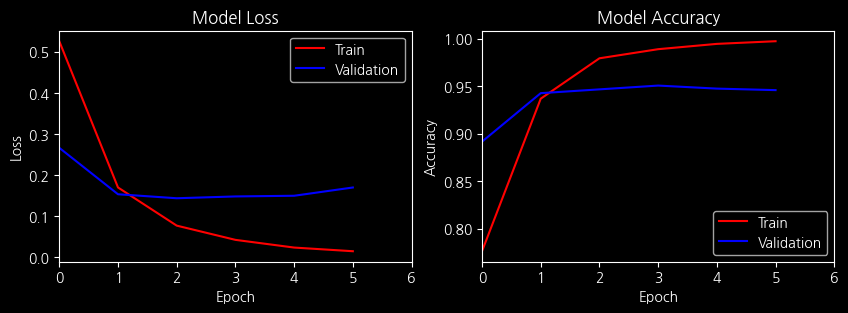

In [157]:
plt.clf()
plt.figure(figsize=(10,3))
# 훈련 손실 그래프
plt.subplot(121)
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='best')
plt.xlim(0,6)

# 훈련 정확도 그래프
plt.subplot(122)
plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'b')  
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='best')
plt.xlim(0,6)

In [56]:
loaded_model = load_model('best_model_GRU.keras')

In [57]:
def review(new_sentence):
    new_sentence = okt.morphs(new_sentence, stem=True)
    encoded = tokenizer.texts_to_sequences([new_sentence])
    pad_new = pad_sequences(encoded, maxlen = 30)
    pred = float(loaded_model.predict(pad_new))
    if pred > 0.5:
        print(f'{pred*100} 확률로 긍정리뷰 입니다.')
    else:
        print(f'{(1-pred)*100} 확률로 부정리뷰 입니다.')

In [58]:
review('존나 맛없음')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
99.98963623511372 확률로 부정리뷰 입니다.


In [59]:
review('인테리어도 구리고 위생이 너무 더럽습니다. 맛은 그럭저럭이고 다시는 안올듯')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
99.99111955621629 확률로 부정리뷰 입니다.


In [60]:
review('맛은 있지만 가격이 너무 비싸네요.')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
99.99819641998329 확률로 부정리뷰 입니다.


In [61]:
review('대체로 맛있는 편이네요. 양이 조금 아쉽네요')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
99.31263327598572 확률로 긍정리뷰 입니다.


In [62]:
review('그냥저냥')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
64.9185836315155 확률로 부정리뷰 입니다.


In [63]:
review('한번쯤 먹을만하네요')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
64.9185836315155 확률로 부정리뷰 입니다.


In [69]:
train_df.to_csv('훈련용데이터.csv',index=False)
test_df.to_csv('테스트데이터.csv',index=False)